In [10]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [11]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

(365, 1)


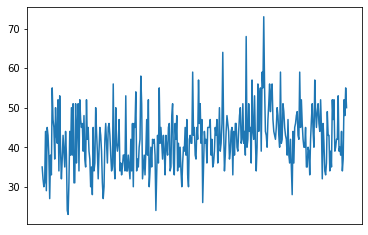

In [12]:
# load and plot daily births dataset
from pandas import read_csv
from matplotlib import pyplot
# load
series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
# summarize shape
print(series.shape)
# plot
pyplot.plot(series)
pyplot.xticks([])
pyplot.show()

In [36]:
# Block below provided by Isah
val = series.values
value_list = val.tolist()
sequence = []
for i in range(len(value_list)):
    seq = value_list[i]
    seq = seq[0]
    sequence.append(seq)
print(sequence)

print("")
# Line below created by myself. Does the exact same thing
sequence = [x[0] for x in series.values.tolist()]
print(sequence)

[35, 32, 30, 31, 44, 29, 45, 43, 38, 27, 38, 33, 55, 47, 45, 37, 50, 43, 41, 52, 34, 53, 39, 32, 37, 43, 39, 35, 44, 38, 24, 23, 31, 44, 38, 50, 38, 51, 31, 31, 51, 36, 45, 51, 34, 52, 47, 45, 46, 39, 48, 37, 35, 52, 42, 45, 39, 37, 30, 35, 28, 45, 34, 36, 50, 44, 39, 32, 39, 45, 43, 39, 31, 27, 30, 42, 46, 41, 36, 45, 46, 43, 38, 34, 35, 56, 36, 32, 50, 41, 39, 41, 47, 34, 36, 33, 35, 38, 38, 34, 53, 34, 34, 38, 35, 32, 42, 34, 46, 30, 46, 45, 54, 34, 37, 35, 40, 42, 58, 51, 32, 35, 38, 33, 39, 47, 38, 52, 30, 34, 40, 35, 42, 41, 42, 38, 24, 34, 43, 36, 55, 41, 45, 41, 37, 43, 39, 33, 43, 40, 38, 45, 46, 34, 35, 48, 51, 36, 33, 46, 42, 48, 34, 41, 35, 40, 34, 30, 36, 40, 39, 45, 38, 47, 33, 30, 42, 43, 41, 41, 59, 43, 45, 38, 37, 45, 42, 57, 46, 51, 41, 47, 26, 35, 44, 41, 42, 36, 45, 45, 45, 47, 38, 42, 35, 36, 39, 45, 43, 47, 36, 41, 50, 39, 41, 46, 64, 45, 34, 38, 44, 48, 46, 44, 37, 39, 44, 45, 33, 44, 38, 46, 46, 40, 39, 44, 48, 50, 41, 42, 51, 41, 44, 38, 68, 40, 42, 51, 44, 45,

In [14]:
# choose a number of time steps
n_steps = 7
# split into samples
X, y = split_sequence(sequence, n_steps)

X_train = X[0:300]
y_train = y[0:300]

X_test = X[300:365]
y_test = y[300:365]


#print (X_test.shape)

In [15]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

In [16]:
# define model
model = Sequential()
model.add(LSTM(75, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
300/300 [==============================] - 1s 3ms/step - loss: 2083.1110
Epoch 2/200
300/300 [==============================] - 0s 169us/step - loss: 865.6536
Epoch 3/200
300/300 [==============================] - 0s 176us/step - loss: 98.3144
Epoch 4/200
300/300 [==============================] - 0s 172us/step - loss: 62.0793
Epoch 5/200
300/300 [==============================] - 0s 172us/step - loss: 58.6358
Epoch 6/200
300/300 [==============================] - 0s 175us/step - loss: 54.8872
Epoch 7/200
300/300 [==============================] - 0s 179us/step - loss: 54.5321
Epoch 8/200
300/300 [==============================] - 0s 179us/step - loss: 54.8432
Epoch 9/200
300/300 [==============================] - 0s 175us/step - loss: 55.3003
Epoch 10/200
300/300 [==============================] - 0s 172us/step - loss: 55.2165
Epoch 11/200
300/300 [==============================] - 0s 169us/step - loss: 53.9338
Epoch 12/200
300/300 [==============================] - 0s 172

In [17]:
# demonstrate prediction
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
Prediction = model.predict(X_test, verbose=0)
#print(Prediction)

In [18]:
for i in range(len(Prediction)):
    print('Expected=%d, Got=%d' % (y_test[i], Prediction[i]))

Expected=42, Got=44
Expected=59, Got=43
Expected=45, Got=45
Expected=52, Got=44
Expected=46, Got=48
Expected=42, Got=49
Expected=40, Got=44
Expected=40, Got=45
Expected=45, Got=44
Expected=35, Got=43
Expected=35, Got=43
Expected=40, Got=40
Expected=39, Got=41
Expected=33, Got=40
Expected=42, Got=39
Expected=47, Got=39
Expected=51, Got=42
Expected=44, Got=42
Expected=40, Got=44
Expected=57, Got=42
Expected=49, Got=44
Expected=45, Got=46
Expected=49, Got=45
Expected=51, Got=47
Expected=46, Got=47
Expected=44, Got=46
Expected=52, Got=47
Expected=45, Got=46
Expected=32, Got=46
Expected=46, Got=43
Expected=41, Got=43
Expected=34, Got=46
Expected=33, Got=42
Expected=36, Got=40
Expected=49, Got=40
Expected=43, Got=38
Expected=43, Got=44
Expected=34, Got=41
Expected=39, Got=41
Expected=35, Got=40
Expected=52, Got=41
Expected=47, Got=42
Expected=52, Got=44
Expected=39, Got=43
Expected=40, Got=44
Expected=42, Got=42
Expected=42, Got=44
Expected=53, Got=44
Expected=39, Got=43
Expected=40, Got=42
